In [ ]:
!pip install ultralytics==8.3.40

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 16.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from operator import itemgetter

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import math
import os

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Model Training

In [ ]:
!cp '/content/drive/MyDrive/HWs Projects/Computer Vision/Final project/Football-player-Detection.v4i.yolov11.zip' /content
!unzip '/content/Football-player-Detection.v4i.yolov11.zip' -d /content/dataset

Archive:  /content/Football-player-Detection.v4i.yolov11.zip
replace /content/dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
 extracting: /content/dataset/test/images/08fd33_9_10_png_jpg.rf.c7d6a45cbb95847bdc430fcb6cbc7c48.jpg  
 extracting: /content/dataset/test/images/08fd33_9_1_png_jpg.rf.391d2dba1295bee09bfdc2077f983afe.jpg  
 extracting: /content/dataset/test/images/08fd33_9_9_png_jpg.rf.8303d7813d39f4bce3838f12541d89a0.jpg  
 extracting: /content/dataset/test/images/2e57b9_7_7_png_jpg.rf.31ec206fdc34c7726390fedc7c424cdb.jpg  
 extracting: /content/dataset/test/images/42ba34_5_7_png_jpg.rf.eebd63531a0fe9c03797d33ed7c2ac44.jpg  
 extracting: /content/dataset/test/images/42ba34_7_1_png_jpg.rf.baf51b3448b1ab7

In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/08fd33_9_10_png_jpg.rf.c7d6a45cbb95847bdc430fcb6cbc7c48.jpg  
 extracting: test/images/08fd33_9_1_png_jpg.rf.391d2dba1295bee09bfdc2077f983afe.jpg  
 extracting: test/images/08fd33_9_9_png_jpg.rf.8303d7813d39f4bce3838f12541d89a0.jpg  
 extracting: test/images/2e57b9_7_7_png_jpg.rf.31ec206fdc34c7726390fedc7c424cdb.jpg  
 extracting: test/images/42ba34_5_7_png_jpg.rf.eebd63531a0fe9c03797d33ed7c2ac44.jpg  
 extracting: test/images/42ba34_7_1_png_jpg.rf.baf51b3448b1ab748e3b1967c35b9f50.jpg  
 extracting: test/images/42ba34_9_8_png_jpg.rf.72b714cdf3facfe13a771d82f1d2af98.jpg  
 extracting: test/images/4b770a_1_3_png_jpg.rf.ae301b8f90bcac227818326cdf9d7d72.jpg  
 extracting: test/images/4b770a_1_8_png_jpg.rf.d3a76d800f5e01575d7cb8b092b0a919.jpg  
 extracting: test/images/4b770a_3_3

In [ ]:
def train(model):

    # model = YOLO("best.pt")  # Ensure the model is valid
    data_path = os.path.join('/content/dataset', 'data.yaml')

    # Train the model with optimized hyperparameters for person detection
    train_results = model.train(
        data=data_path,       # Dataset configuration
        epochs=50,            # Number of epochs
        batch=16,             # Batch size (adjust based on GPU memory)
        imgsz=640,            # Image size for training
        device='cuda',        # Use GPU for training
        lr0=0.0001,           # Initial learning rate
        momentum=0.937,       # SGD momentum
        cls=0.5,              # Class loss gain
        hsv_h=0.015,          # HSV hue augmentation
        hsv_s=0.7,            # HSV saturation augmentation
        hsv_v=0.4             # HSV value augmentation
    )

    print("Training complete")
    return train_results

if __name__ == '__main__':
    model = YOLO("/content/last.pt")  # Ensure the model is valid
    results = train(model)

New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/last.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

100%|██████████| 5.35M/5.35M [00:00<00:00, 227MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 726 images, 0 backgrounds, 0 corrupt: 100%|██████████| 726/726 [00:00<00:00, 1491.64it/s]

train: WARNING ⚠️ /content/dataset/train/images/Ekran-Resmi-2024-10-27-00-21-09-3_png.rf.32a457d113cef03e3f0a952c46cbae69.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/dataset/train/images/Ekran-Resmi-2024-10-27-00-21-42-1_png.rf.e60854f57dc6f868f861cfaa8bf1022a.jpg: 1 duplicate labels removed
train: New cache created: /content/dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 47, len(boxes) = 16997. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 166 images, 0 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<00:00, 726.67it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.93G     0.7675        0.4     0.8023        181        640: 100%|██████████| 46/46 [00:30<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        166       3851      0.856      0.807      0.824      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.94G     0.8226     0.4237     0.8049        206        640: 100%|██████████| 46/46 [00:27<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        166       3851      0.858      0.783      0.808      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       8.9G     0.8686     0.4536     0.8034        173        640: 100%|██████████| 46/46 [00:29<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        166       3851      0.841      0.794       0.82      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.79G     0.8289     0.4402     0.8073        252        640: 100%|██████████| 46/46 [00:28<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        166       3851      0.816      0.775      0.799      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.83G     0.8508     0.4476     0.8057        197        640: 100%|██████████| 46/46 [00:27<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]


                   all        166       3851      0.869      0.761      0.812      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.86G     0.8303     0.4318     0.8067        171        640: 100%|██████████| 46/46 [00:29<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        166       3851      0.851      0.769      0.811      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.88G     0.8317     0.4385     0.8068        176        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        166       3851      0.837      0.765      0.798      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.88G     0.8073     0.4235     0.8039        183        640: 100%|██████████| 46/46 [00:27<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        166       3851      0.862       0.78      0.815       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.79G     0.8429     0.4511     0.8124        163        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        166       3851      0.844      0.797      0.823      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.87G      0.865     0.4594     0.8093        170        640: 100%|██████████| 46/46 [00:30<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        166       3851      0.877       0.77      0.818      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.86G     0.8137     0.4275     0.8041        135        640: 100%|██████████| 46/46 [00:27<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        166       3851      0.855      0.787      0.836      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.77G     0.8315     0.4357     0.8057        222        640: 100%|██████████| 46/46 [00:28<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        166       3851      0.864      0.785      0.814      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.84G     0.8304     0.4477     0.8054        161        640: 100%|██████████| 46/46 [00:29<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        166       3851      0.891      0.768      0.814      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.69G     0.8337     0.4456       0.81        263        640: 100%|██████████| 46/46 [00:27<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        166       3851      0.894      0.769      0.813       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.83G     0.8013     0.4305     0.8025        229        640: 100%|██████████| 46/46 [00:27<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        166       3851      0.901       0.78       0.82      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.89G     0.8184     0.4282     0.8035        177        640: 100%|██████████| 46/46 [00:29<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        166       3851      0.893      0.773      0.817      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.81G     0.8027      0.422     0.8053        187        640: 100%|██████████| 46/46 [00:27<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        166       3851      0.849      0.801      0.819      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.83G     0.8315     0.4288     0.8047        122        640: 100%|██████████| 46/46 [00:28<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        166       3851      0.875      0.795      0.821      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.82G     0.7998     0.4151     0.8047        160        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        166       3851      0.899      0.772      0.829      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.83G     0.7869     0.4213     0.8061        136        640: 100%|██████████| 46/46 [00:27<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        166       3851      0.862      0.774      0.814      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.85G     0.8062     0.4226     0.8054        146        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        166       3851      0.861      0.775      0.828      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.85G     0.8223     0.4258     0.8045        134        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        166       3851      0.903      0.774      0.825      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.93G     0.7928      0.415     0.8079        138        640: 100%|██████████| 46/46 [00:29<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        166       3851      0.853      0.794       0.83      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.87G     0.7766     0.4134     0.8073        209        640: 100%|██████████| 46/46 [00:29<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        166       3851      0.883      0.797      0.828      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.92G     0.7883     0.4099     0.8027        166        640: 100%|██████████| 46/46 [00:27<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        166       3851      0.862      0.795      0.847      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.78G     0.7849     0.4167     0.8077        148        640: 100%|██████████| 46/46 [00:28<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        166       3851      0.831      0.806      0.824      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.89G     0.8116     0.4266     0.8078        182        640: 100%|██████████| 46/46 [00:28<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        166       3851      0.856      0.799      0.821      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.75G     0.7947     0.4115     0.8019        134        640: 100%|██████████| 46/46 [00:27<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        166       3851      0.882      0.796      0.824      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.83G     0.7787     0.3973     0.8014        229        640: 100%|██████████| 46/46 [00:29<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        166       3851      0.861      0.803      0.827      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.72G     0.7619     0.3916     0.7995        197        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        166       3851      0.863      0.814      0.831      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.91G     0.7716     0.3982     0.7992        155        640: 100%|██████████| 46/46 [00:28<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]

                   all        166       3851      0.893       0.78      0.825      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.74G     0.7637     0.4007     0.8028        240        640: 100%|██████████| 46/46 [00:27<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        166       3851      0.881      0.779      0.824      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.81G     0.7761     0.4005     0.7997        115        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        166       3851      0.849      0.797      0.825      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.88G     0.7753     0.4039     0.8045        110        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        166       3851      0.884      0.789      0.834      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       8.9G     0.7498     0.3807      0.797        148        640: 100%|██████████| 46/46 [00:27<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        166       3851       0.89      0.782      0.835      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.82G     0.7623     0.3962     0.8014        190        640: 100%|██████████| 46/46 [00:29<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        166       3851       0.89      0.794      0.832      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       8.9G      0.753     0.3835     0.7963        214        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        166       3851      0.898      0.804      0.848      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.85G       0.76     0.3847     0.7968        112        640: 100%|██████████| 46/46 [00:27<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        166       3851      0.877        0.8      0.839      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       8.9G     0.7573     0.3832     0.7969        201        640: 100%|██████████| 46/46 [00:28<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        166       3851       0.92      0.788       0.84      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.78G      0.737     0.3731     0.7928        195        640: 100%|██████████| 46/46 [00:29<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        166       3851      0.877      0.797      0.839        0.6


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.74G     0.6966     0.3555     0.8029        137        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        166       3851      0.874        0.8       0.84      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.69G     0.6973     0.3578     0.8009        137        640: 100%|██████████| 46/46 [00:28<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        166       3851      0.894      0.788      0.838      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.73G     0.6928     0.3584     0.7982        137        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]


                   all        166       3851      0.855        0.8      0.837      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.69G     0.6822     0.3534     0.8001        141        640: 100%|██████████| 46/46 [00:27<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        166       3851      0.876        0.8      0.842      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.76G     0.6839     0.3506     0.7982        130        640: 100%|██████████| 46/46 [00:28<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        166       3851      0.882      0.806      0.842      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.69G     0.6756      0.348     0.7968        132        640: 100%|██████████| 46/46 [00:27<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]

                   all        166       3851      0.891      0.805      0.841        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.74G     0.6817     0.3459     0.7993        143        640: 100%|██████████| 46/46 [00:26<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]


                   all        166       3851      0.901      0.798      0.843      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.69G     0.6783     0.3475     0.7968        138        640: 100%|██████████| 46/46 [00:27<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        166       3851      0.905      0.789       0.84      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.78G     0.6719     0.3438     0.7965        131        640: 100%|██████████| 46/46 [00:28<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        166       3851      0.884      0.802      0.841        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.69G     0.6664       0.34     0.7945        136        640: 100%|██████████| 46/46 [00:27<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        166       3851      0.894      0.796      0.843      0.606



50 epochs completed in 0.472 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]


                   all        166       3851      0.894      0.796      0.843      0.606
                  ball        142        145      0.856      0.368      0.503      0.228
            goalkeeper        128        133      0.909       0.94      0.953      0.712
                player        166       3268      0.962      0.967      0.988      0.805
               referee        165        305      0.849      0.911      0.926      0.679
Speed: 0.2ms preprocess, 11.4ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train
Training complete


## Inital Implementation

In [ ]:
IMGSZ = 1280
THRESHOLD = 40

In [ ]:
model = YOLO("/content/last.pt")

In [ ]:
image_path = "0.jpg"
image = cv2.imread(image_path)
image = cv2.imread(image_path)
image = cv2.resize(image, (IMGSZ, IMGSZ))
org_image = cv2.imread(image_path)
# _, image, _ = field_segmentation(image_path)
results = model.predict(image, iou=0.4, conf = 0.4)


0: 640x640 13 players, 2 referees, 1541.9ms
Speed: 7.0ms preprocess, 1541.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
image2 = image
image3 = image

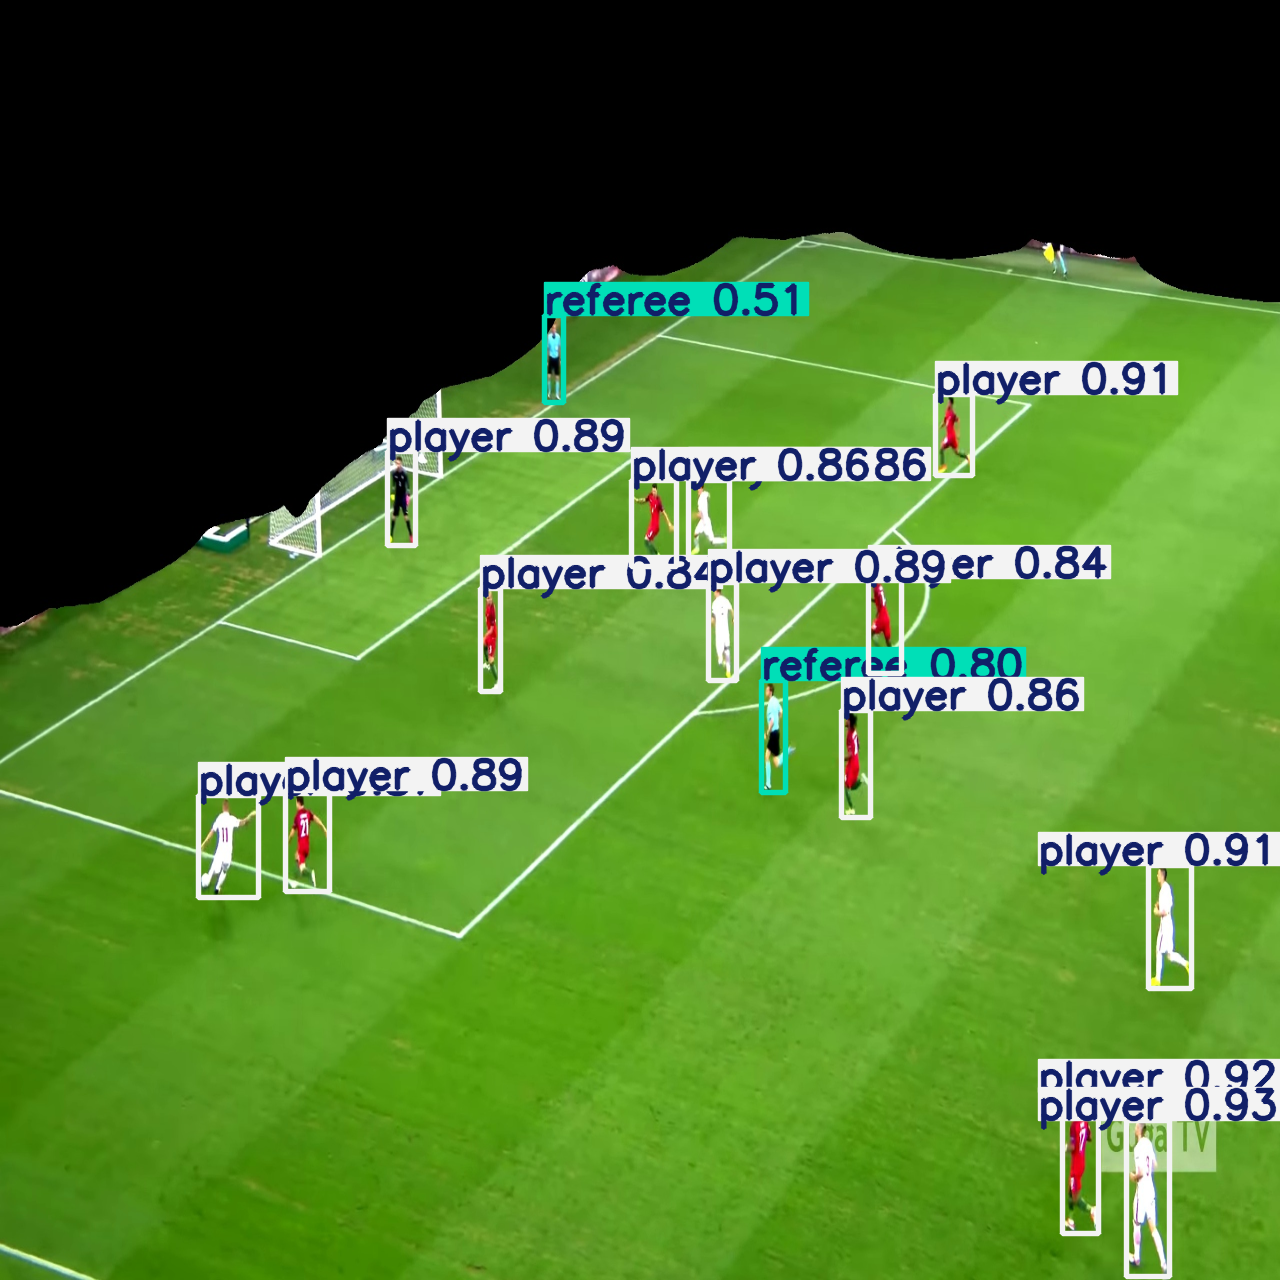

In [ ]:
results[0].show()

In [ ]:
mask_color = []

# Define HSV ranges for green detection
lower_green = np.array([40, 40, 40])   # Lower bound for green (Hue, Saturation, Value)
upper_green = np.array([80, 255, 255])  # Upper bound for green (Hue, Saturation, Value)

# Loop through detections to work with bounding boxes
for result in results:
    # Get bounding boxes and class IDs
    boxes = result.boxes  # Bounding boxes
    class_ids = boxes.cls.cpu().numpy()  # Class IDs for each detected object
    confidences = boxes.conf.cpu().numpy()  # Confidence scores for each detection

    counter = 1
    for i, box in enumerate(boxes.xyxy):  # box contains (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.cpu().numpy())

        if class_ids[i] == 2:  # Check if the class is 'person' (class ID 2)
            confidence = confidences[i]

            # Crop the region within the bounding box
            cropped_region = image2[y1:y2, x1:x2]

            bottom_center_x = (x1 + x2) // 2
            bottom_center_y = y2

            # Convert cropped_region to HSV to detect green areas
            hsv_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2HSV)
            green_mask = cv2.inRange(hsv_region, lower_green, upper_green)

            # Invert the mask to exclude green areas
            non_green_mask = cv2.bitwise_not(green_mask)

            # Apply mask to cropped_region to exclude green grass
            non_green_region = cv2.bitwise_and(cropped_region, cropped_region, mask=non_green_mask)

            # Calculate the mean color ignoring green grass
            non_green_pixels = non_green_region[non_green_mask > 0]
            if len(non_green_pixels) > 0:
                mean_color = np.mean(non_green_pixels, axis=0)

                # Draw the bounding box
                cv2.rectangle(image2, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Annotate the bounding box with confidence
                cv2.putText(image2, f"{counter}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
                cv2.putText(image2, f"Conf: {confidence:.2f}", (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

                # Annotate the mean color
                mean_color_text = f"Mean: {tuple(int(c) for c in mean_color)}"
                cv2.putText(image2, mean_color_text, (x1, y2 + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

                if confidence > 0.5:
                    mask_color.append((confidence, counter, tuple(int(c) for c in mean_color), bottom_center_x, bottom_center_y))

                counter += 1

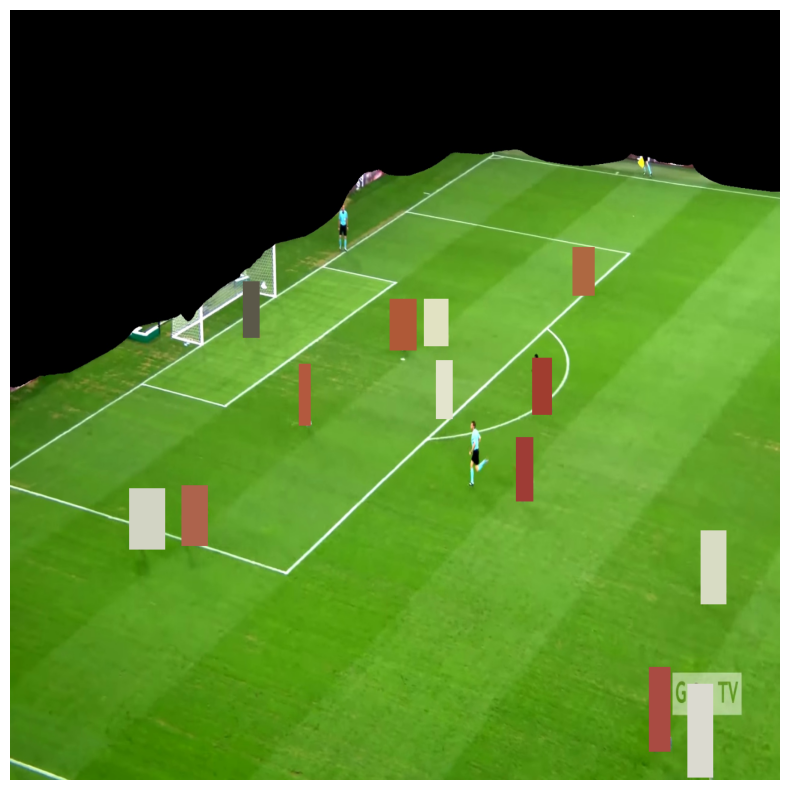

In [ ]:
mask_color = []

# Make a copy of image2 into image4
image4 = image2.copy()  # Create a deep copy of image2

# Define HSV ranges for green detection
lower_green = np.array([40, 40, 40])   # Lower bound for green (Hue, Saturation, Value)
upper_green = np.array([80, 255, 255])  # Upper bound for green (Hue, Saturation, Value)

# Loop through detections to work with bounding boxes
for result in results:
    # Get bounding boxes and class IDs
    boxes = result.boxes  # Bounding boxes
    class_ids = boxes.cls.cpu().numpy()  # Class IDs for each detected object
    confidences = boxes.conf.cpu().numpy()  # Confidence scores for each detection

    counter = 1
    for i, box in enumerate(boxes.xyxy):  # box contains (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.cpu().numpy())

        if class_ids[i] == 2:  # Check if the class is 'person' (class ID 2)
            confidence = confidences[i]

            # Crop the region within the bounding box
            cropped_region = image4[y1:y2, x1:x2]

            bottom_center_x = (x1 + x2) // 2
            bottom_center_y = y2

            # Convert cropped_region to HSV to detect green areas
            hsv_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2HSV)
            green_mask = cv2.inRange(hsv_region, lower_green, upper_green)

            # Invert the mask to exclude green areas
            non_green_mask = cv2.bitwise_not(green_mask)

            # Apply mask to cropped_region to exclude green grass
            non_green_region = cv2.bitwise_and(cropped_region, cropped_region, mask=non_green_mask)

            # Calculate the mean color ignoring green grass
            non_green_pixels = non_green_region[non_green_mask > 0]
            if len(non_green_pixels) > 0:
                mean_color = np.mean(non_green_pixels, axis=0)

                # Convert mean_color to integer
                mean_color = tuple(int(c) for c in mean_color)

                # Fill the bounding box with the mean color in image4
                image4[y1:y2, x1:x2] = np.full((y2 - y1, x2 - x1, 3), mean_color, dtype=np.uint8)

                # Draw the bounding box border on image4
                # cv2.rectangle(image4, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Annotate the bounding box with confidence on image4
                # cv2.putText(image4, f"{counter}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
                # cv2.putText(image4, f"Conf: {confidence:.2f}", (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

                # Annotate the mean color on image4
                mean_color_text = f"Mean: {mean_color}"
                # cv2.putText(image4, mean_color_text, (x1, y2 + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

                if confidence > 0.5:
                    mask_color.append((confidence, counter, mean_color, bottom_center_x, bottom_center_y))

                counter += 1

# Convert BGR image4 to RGB for displaying with matplotlib
image4_rgb = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image4_rgb)
plt.axis('off')
plt.show()

In [ ]:
# Sample input: list of tuples (mean_color, mask_id)
mean_colors = mask_color

# Extract the mean colors for clustering
mean_color_values = np.array([item[2] for item in mean_colors])
mask_ids = [(item[3], item[4]) for item in mean_colors]

# Step 1: Perform K-means clustering to classify into 2 main groups
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(mean_color_values)
centroids = kmeans.cluster_centers_

# Step 2: Calculate distances of each object to the centroids
distances = cdist(mean_color_values, centroids)

# Step 3: Assign masks to groups
group1, group2, group3 = [], [], []

for i, mask_id in enumerate(mask_ids):
    if labels[i] == 0 and distances[i, 0] <= distances[i, 1]:
        group1.append(mask_id)
    elif labels[i] == 1 and distances[i, 1] <= distances[i, 0]:
        group2.append(mask_id)
    else:
        group3.append(mask_id)

# Step 4: Add any outliers (far from both centroids) to Group 3
outlier_threshold = np.percentile(distances.min(axis=1), 90)
for i, dist in enumerate(distances.min(axis=1)):
    if dist > outlier_threshold:
        group3.append(mask_ids[i])
        if mask_ids[i] in group1:
            group1.remove(mask_ids[i])
        elif mask_ids[i] in group2:
            group2.remove(mask_ids[i])

# Print the results
print("Group 1 (Similar objects - Type 1):", group1)
print("Group 2 (Similar objects - Type 2):", group2)
print("Group 3 (Unclassified/Remaining):", group3)

Group 1 (Similar objects - Type 1): [(1147, 1276), (1169, 988), (722, 680), (228, 897), (708, 559)]
Group 2 (Similar objects - Type 2): [(1080, 1233), (953, 475), (307, 891), (855, 817), (653, 566), (490, 691)]
Group 3 (Unclassified/Remaining): [(401, 545), (884, 673)]


In [ ]:
group1_coordinates = [coord for coord in group1]
group2_coordinates = [coord for coord in group2]
group3_coordinates = [coord for coord in group3]

In [ ]:
print(group1_coordinates)

[(1147, 1276), (1169, 988), (722, 680), (228, 897), (708, 559)]


In [ ]:
def resize_coordinates(coords, old_width=IMGSZ, old_height=IMGSZ, new_width=512, new_height=512):
    # Calculate scaling factors for both axes
    scale_x = new_width / old_width
    scale_y = new_height / old_height

    # Resize the coordinates
    resized_coords = [(int(x * scale_x), int(y * scale_y)) for x, y in coords]

    return resized_coords

In [ ]:
resized_coordinates_group1 = resize_coordinates(group1_coordinates, new_height=org_image.shape[0], new_width=org_image.shape[1])
resized_coordinates_group2 = resize_coordinates(group2_coordinates, new_height=org_image.shape[0], new_width=org_image.shape[1])
resized_coordinates_group3 = resize_coordinates(group3_coordinates, new_height=org_image.shape[0], new_width=org_image.shape[1])

print('Group 1 coordinates:', resized_coordinates_group1)
print('Group 2 coordinates:', resized_coordinates_group2)
print('Group 3 coordinates:', resized_coordinates_group3)

Group 1 coordinates: [(2294, 1435), (2338, 1111), (1444, 765), (456, 1009), (1416, 628)]
Group 2 coordinates: [(2160, 1387), (1906, 534), (614, 1002), (1710, 919), (1306, 636), (980, 777)]
Group 3 coordinates: [(802, 613), (1768, 757)]


In [ ]:
# Writing group_coordinates to a file for pitch sementation to read
with open('group_coordinates.txt', 'w') as file:
    # Write group 1 coordinates
    file.write('Group 1 Coordinates:\n')
    for coord in resized_coordinates_group1:
        file.write(f'{coord}\n')

    # Write group 2 coordinates
    file.write('\nGroup 2 Coordinates:\n')
    for coord in resized_coordinates_group2:
        file.write(f'{coord}\n')

    # Write group 3 coordinates
    file.write('\nGroup 3 Coordinates:\n')
    for coord in resized_coordinates_group3:
        file.write(f'{coord}\n')

print(f"Data has been written to file")

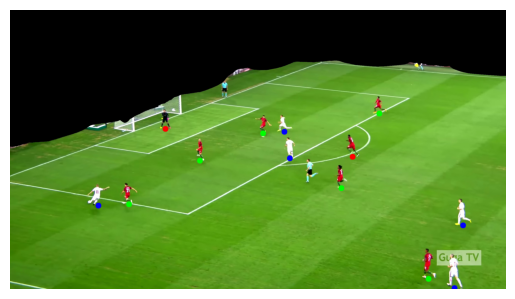

In [ ]:
org_image_copy = org_image.copy() # np.zeros((256, 256, 3), dtype=np.uint8)

# Define colors for each group (in BGR format)
color_group_1 = (255, 0, 0)  # Red
color_group_2 = (0, 255, 0)  # Green
color_group_3 = (0, 0, 255)  # Blue

# Plot the points for each group with different colors
for (x, y) in resized_coordinates_group1:
    cv2.circle(org_image_copy, (x, y), 15, color_group_1, -1)

for (x, y) in resized_coordinates_group2:
    cv2.circle(org_image_copy, (x, y), 15, color_group_2, -1)

for (x, y) in resized_coordinates_group3:
    cv2.circle(org_image_copy, (x, y), 15, color_group_3, -1)

# Convert BGR to RGB for displaying with matplotlib
org_image_copy_rgb = cv2.cvtColor(org_image_copy, cv2.COLOR_BGR2RGB)

# Display the image with the plotted points
plt.imshow(org_image_copy_rgb)
plt.axis('off')
plt.show()

## Testing Code


In [ ]:
def field_segmentation(image_path):
    """
    Segments the soccer field from an input image based on green chromaticity.

    Parameters:
    - image_path: Path to the input image

    Returns:
    - binary_mask: Binary mask where the field is segmented (1 for field, 0 for others)
    - segmented_image: Original image with non-field areas masked out
    """
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to HSV color space
    blurred_hsv_image = cv2.GaussianBlur(image, (101, 101), 100)
    hsv_image = cv2.cvtColor(blurred_hsv_image, cv2.COLOR_RGB2HSV)


    # Define green color range in HSV
    # Adjust these values for robustness across lighting conditions
    lower_green = np.array([25, 30, 30])  # Adjust the lower bound of green
    upper_green = np.array([85, 255, 255])  # Adjust the upper bound of green

    # Create a binary mask for green areas
    binary_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Refine the mask using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

    # Apply the binary mask to the original image
    segmented_image = cv2.bitwise_and(image, image, mask=binary_mask)

    return binary_mask, segmented_image, blurred_hsv_image

In [ ]:
# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Function to match identified to ground truth with a threshold
def match_positions(identified, ground_truth, threshold):
    matches = []
    unmatched_gt = set(range(len(ground_truth)))
    unmatched_id = set(range(len(identified)))

    for i, id_pos in enumerate(identified):
        best_match = None
        min_distance = float('inf')
        for j, gt_pos in enumerate(ground_truth):
            if j in unmatched_gt:
                distance = euclidean_distance(id_pos, gt_pos)
                if distance < min_distance and distance < threshold:
                    min_distance = distance
                    best_match = j
        if best_match is not None:
            matches.append((i, best_match))
            unmatched_gt.remove(best_match)
            unmatched_id.remove(i)

    return matches, unmatched_gt, unmatched_id


In [ ]:
def resize_coordinates(coords, old_width=IMGSZ, old_height=IMGSZ, new_width=512, new_height=512):
    # Calculate scaling factors for both axes
    scale_x = new_width / old_width
    scale_y = new_height / old_height

    # Resize the coordinates
    resized_coords = [(int(x * scale_x), int(y * scale_y)) for x, y in coords]

    return resized_coords

In [ ]:
def get_coordinates_for_players(image):
    org_image = image.copy()
    image = cv2.resize(image, (IMGSZ, IMGSZ))

    results = new_model.predict(image, iou=0.4, conf = 0.4)
    resized_coordinates_group1, resized_coordinates_group2, resized_coordinates_group3 = get_coordinates_by_teams(results, image, org_image)
    return resized_coordinates_group1, resized_coordinates_group2, resized_coordinates_group3

In [ ]:
def get_coordinates_by_teams(results, image, org_image):
  sc = []
  mask_color = []
  image2 = image.copy()
  font = cv2.FONT_HERSHEY_SIMPLEX

  # Define HSV ranges for green detection
  lower_green = np.array([40, 40, 40])   # Lower bound for green (Hue, Saturation, Value)
  upper_green = np.array([80, 255, 255])  # Upper bound for green (Hue, Saturation, Value)

  for result in results:
      # Get bounding boxes and class IDs
      boxes = result.boxes  # Bounding boxes
      class_ids = boxes.cls.cpu().numpy()  # Class IDs for each detected object
      confidences = boxes.conf.cpu().numpy()  # Confidence scores for each detection

      counter = 1
      for i, box in enumerate(boxes.xyxy):  # box contains (x1, y1, x2, y2)
          x1, y1, x2, y2 = map(int, box.cpu().numpy())

          if class_ids[i] == 2:  # Check if the class is 'person' (class ID 2)
              confidence = confidences[i]

              # Crop the region within the bounding box
              cropped_region = image2[y1:y2, x1:x2]

              bottom_center_x = (x1 + x2) // 2
              bottom_center_y = y2

              # Convert cropped_region to HSV to detect green areas
              hsv_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2HSV)
              green_mask = cv2.inRange(hsv_region, lower_green, upper_green)

              # Invert the mask to exclude green areas
              non_green_mask = cv2.bitwise_not(green_mask)

              # Apply mask to cropped_region to exclude green grass
              non_green_region = cv2.bitwise_and(cropped_region, cropped_region, mask=non_green_mask)

              # Calculate the mean color ignoring green grass
              non_green_pixels = non_green_region[non_green_mask > 0]
              if len(non_green_pixels) > 0:
                  mean_color = np.mean(non_green_pixels, axis=0)

                  # Draw the bounding box
                  cv2.rectangle(image2, (x1, y1), (x2, y2), (0, 255, 0), 2)

                  # Annotate the bounding box with confidence
                  cv2.putText(image2, f"{counter}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
                  cv2.putText(image2, f"Conf: {confidence:.2f}", (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

                  # Annotate the mean color
                  mean_color_text = f"Mean: {tuple(int(c) for c in mean_color)}"
                  cv2.putText(image2, mean_color_text, (x1, y2 + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)


                  mask_color.append((confidence, counter, tuple(int(c) for c in mean_color), bottom_center_x, bottom_center_y))

                  counter += 1

  # Sample input: list of tuples (mean_color, mask_id)
  mean_colors = mask_color

  # Extract the mean colors for clustering
  mean_color_values = np.array([item[2] for item in mean_colors])
  mask_ids = [(item[3], item[4]) for item in mean_colors]

  # Step 1: Perform K-means clustering to classify into 2 main groups
  kmeans = KMeans(n_clusters=2, random_state=42)
  labels = kmeans.fit_predict(mean_color_values)
  centroids = kmeans.cluster_centers_

  # Step 2: Calculate distances of each object to the centroids
  distances = cdist(mean_color_values, centroids)

  # Step 3: Assign masks to groups
  group1, group2, group3 = [], [], []

  for i, mask_id in enumerate(mask_ids):
      if labels[i] == 0 and distances[i, 0] <= distances[i, 1]:
          group1.append(mask_id)
      elif labels[i] == 1 and distances[i, 1] <= distances[i, 0]:
          group2.append(mask_id)
      else:
          group3.append(mask_id)

  # Step 4: Add any outliers (far from both centroids) to Group 3
  outlier_threshold = np.percentile(distances.min(axis=1), 90) # TODO: Make Variable
  for i, dist in enumerate(distances.min(axis=1)):
      if dist > outlier_threshold:
          group3.append(mask_ids[i])
          if mask_ids[i] in group1:
              group1.remove(mask_ids[i])
          elif mask_ids[i] in group2:
              group2.remove(mask_ids[i])

  group1_coordinates = [coord for coord in group1]
  group2_coordinates = [coord for coord in group2]
  group3_coordinates = [coord for coord in group3]
  resized_coordinates_group1 = resize_coordinates(group1_coordinates, new_height=org_image.shape[0], new_width=org_image.shape[1])
  resized_coordinates_group2 = resize_coordinates(group2_coordinates, new_height=org_image.shape[0], new_width=org_image.shape[1])
  resized_coordinates_group3 = resize_coordinates(group3_coordinates, new_height=org_image.shape[0], new_width=org_image.shape[1])
  return resized_coordinates_group1, resized_coordinates_group2, resized_coordinates_group3

In [ ]:
def compute_metrics(resized_coordinates_group1, resized_coordinates_group2, ground_truth_team1, ground_truth_team2):
  # Align teams by minimizing total unmatched positions
  identified_team1 = resized_coordinates_group1
  identified_team2 = resized_coordinates_group2
  alignments = [
      (identified_team1, ground_truth_team1, identified_team2, ground_truth_team2),
      (identified_team1, ground_truth_team2, identified_team2, ground_truth_team1),
  ]

  best_alignment = None
  min_unmatched = float('inf')
  best_results = None
  threshold = THRESHOLD # 40

  for team1, gt1, team2, gt2 in alignments:
      matches1, unmatched_gt1, unmatched_id1 = match_positions(team1, gt1, threshold)
      matches2, unmatched_gt2, unmatched_id2 = match_positions(team2, gt2, threshold)
      total_unmatched = len(unmatched_gt1) + len(unmatched_id1) + len(unmatched_gt2) + len(unmatched_id2)
      if total_unmatched < min_unmatched:
          min_unmatched = total_unmatched
          best_alignment = (team1, gt1, team2, gt2)
          best_results = (matches1, unmatched_gt1, unmatched_id1, matches2, unmatched_gt2, unmatched_id2)

  # Unpack best results
  identified_team1_aligned, ground_truth_team1_aligned, identified_team2_aligned, ground_truth_team2_aligned = best_alignment
  matches1, unmatched_gt1, unmatched_id1, matches2, unmatched_gt2, unmatched_id2 = best_results

  # Evaluation Metrics
  total_ground_truth = len(ground_truth_team1_aligned) + len(ground_truth_team2_aligned)
  total_identified = len(identified_team1_aligned) + len(identified_team2_aligned)
  correct_matches = len(matches1) + len(matches2)
  missed = len(unmatched_gt1) + len(unmatched_gt2)
  extra = len(unmatched_id1) + len(unmatched_id2)

  precision = correct_matches / total_identified if total_identified > 0 else 0
  recall = correct_matches / total_ground_truth if total_ground_truth > 0 else 0
  accuracy = correct_matches / (correct_matches + missed + extra) if (correct_matches + missed + extra) > 0 else 0

  return precision, recall, accuracy

  print(f"Correct matches: {correct_matches}")
  print(f"Missed ground truth players: {missed}")
  print(f"Extra identified players: {extra}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# Function to extract image names and ground truth coordinates
def extract_image_coordinates(data):
    ovr_precision = 0
    ovr_recall = 0
    ovr_accuracy = 0
    count = 0
    for i, entry in enumerate(data):  # Loop through each image entry
        # if i == 50: break
        image_name = entry.get("Image_ID")
        count += 1
        path = root_dir + "/" +  image_name
        _, segmented_image, _ = field_segmentation(path)
        resized_coordinates_group1, resized_coordinates_group2, resized_coordinates_group3 = get_coordinates_for_players(segmented_image)
        ground_truth_team1 = [(player["avg_x"], player["avg_y"]) for player in entry["Processed_Pose"]["Team1"]]
        ground_truth_team2 = [(player["avg_x"], player["avg_y"]) for player in entry["Processed_Pose"]["Team2"]]
        precision, recall, accuracy = compute_metrics(resized_coordinates_group1, resized_coordinates_group2, ground_truth_team1, ground_truth_team2)
        ovr_precision +=  precision
        ovr_accuracy += accuracy
        ovr_recall += recall

    print(ovr_accuracy/count, ovr_precision/count, ovr_recall/count, count)
    return ovr_precision/count, ovr_recall/count, ovr_accuracy/count

In [ ]:
import json

root_dir = "/content/drive/MyDrive/HWs Projects/Computer Vision/Final project/Offside_Images"

with open("/content/drive/MyDrive/HWs Projects/Computer Vision/Final project/processed_multiple_images.json", "r") as f:
    data = json.load(f)

# Extract the data
p,r,a = extract_image_coordinates(data)


0: 640x640 15 players, 37.1ms
Speed: 4.4ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ball, 13 players, 37.0ms
Speed: 3.0ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 players, 37.0ms
Speed: 2.7ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 players, 2 referees, 37.1ms
Speed: 4.0ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 18 players, 37.1ms
Speed: 3.2ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 players, 1 referee, 37.0ms
Speed: 3.8ms preprocess, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 19 players, 37.1ms
Speed: 3.2ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 goalkeeper, 20 players, 37.0ms
Speed: 3.8ms preprocess, 37.

In [ ]:
print('Evaluation parameters', end = '\n----------------------------------\n')
print('Precision:', p)
print('Recall:', r)
print('Accuracy:', a)
print('F1 score:', 2*p*r/(p+r))

Evaluation parameters
----------------------------------
Precision: 0.8247794841410421
Recall: 0.7424370332566446
Accuracy: 0.6632144780336932
F1 score: 0.7814450990006199
